In [50]:
import pandas as pd
import numpy as np
from data_process import *
from metadata import *
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
from plotly.offline import plot, iplot, download_plotlyjs, init_notebook_mode
import seaborn as sns

init_notebook_mode(connected=True)
cf.go_offline()

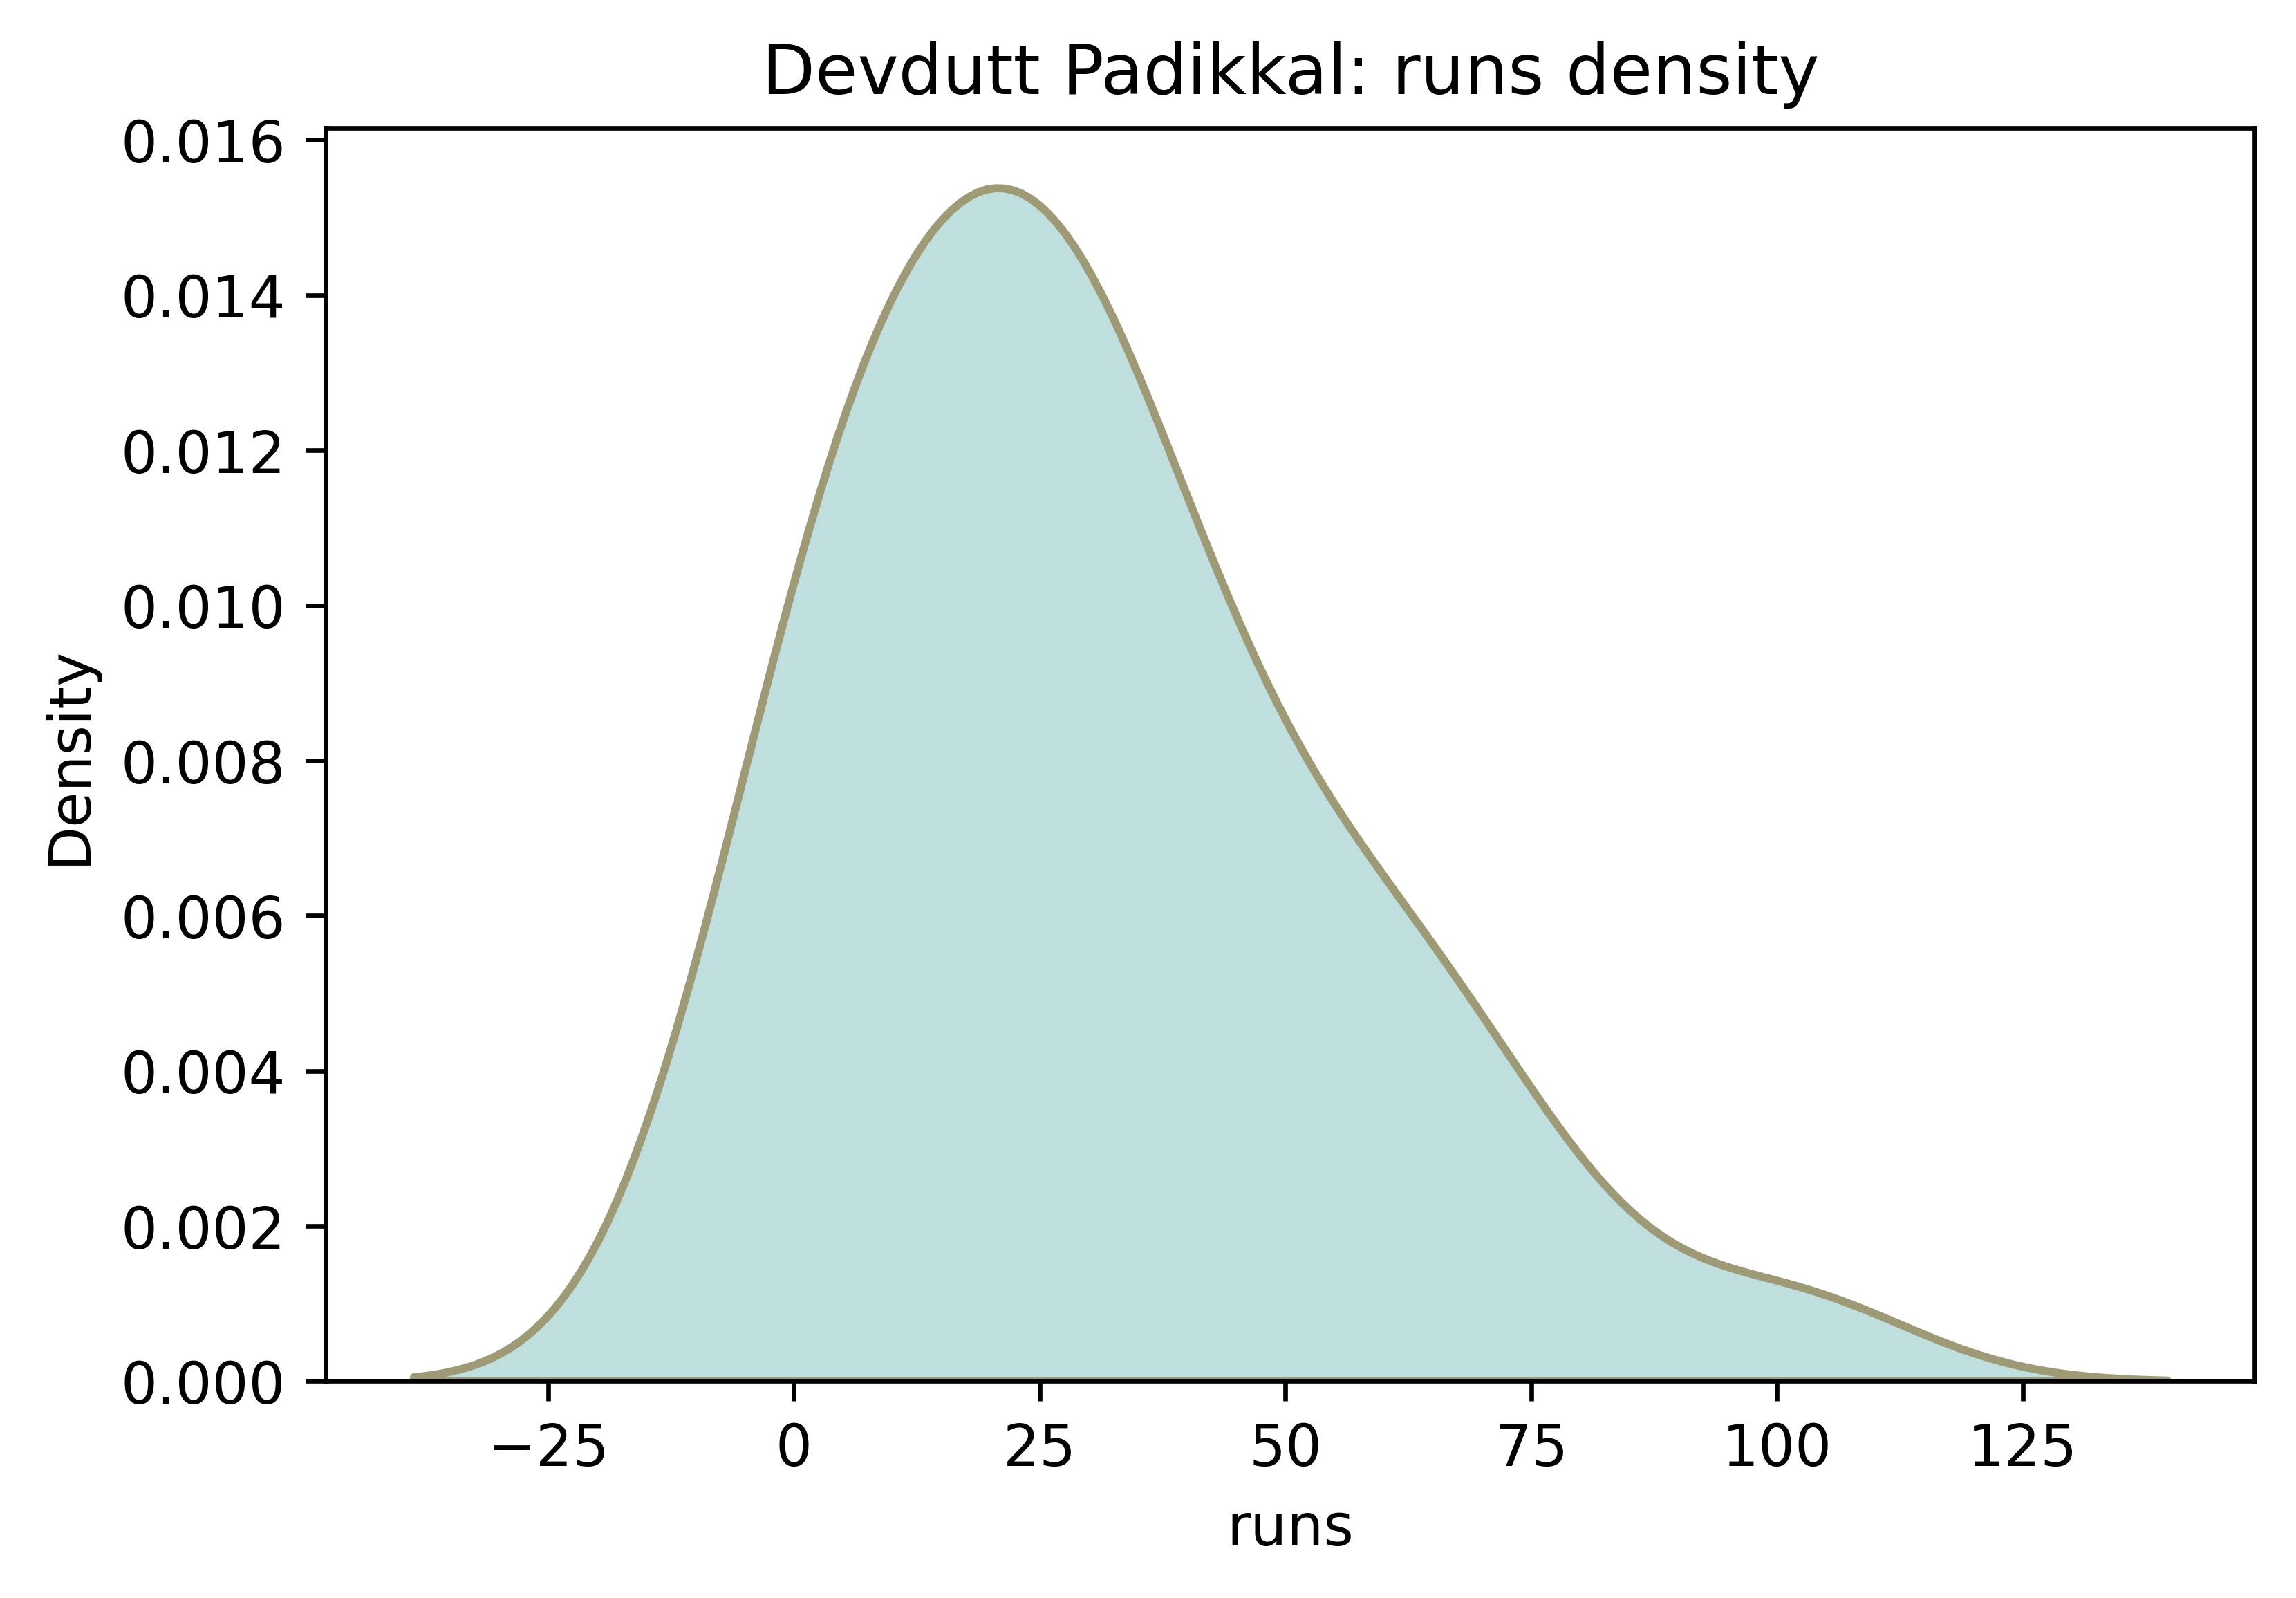

In [51]:
# run per match of given batsmen
def run_per_match(batsman):
    run_batsmen = season_batting_card_df[season_batting_card_df['fullName'] == batsman]
    run_batsmen = run_batsmen[['runs']]
    sns.kdeplot(run_batsmen['runs'], shade=True, color='#008080', fill=True, lw=1.4, edgecolor='#9e9a75')
    plt.title("{}: runs density".format(batsman))

run_per_match('Devdutt Padikkal')

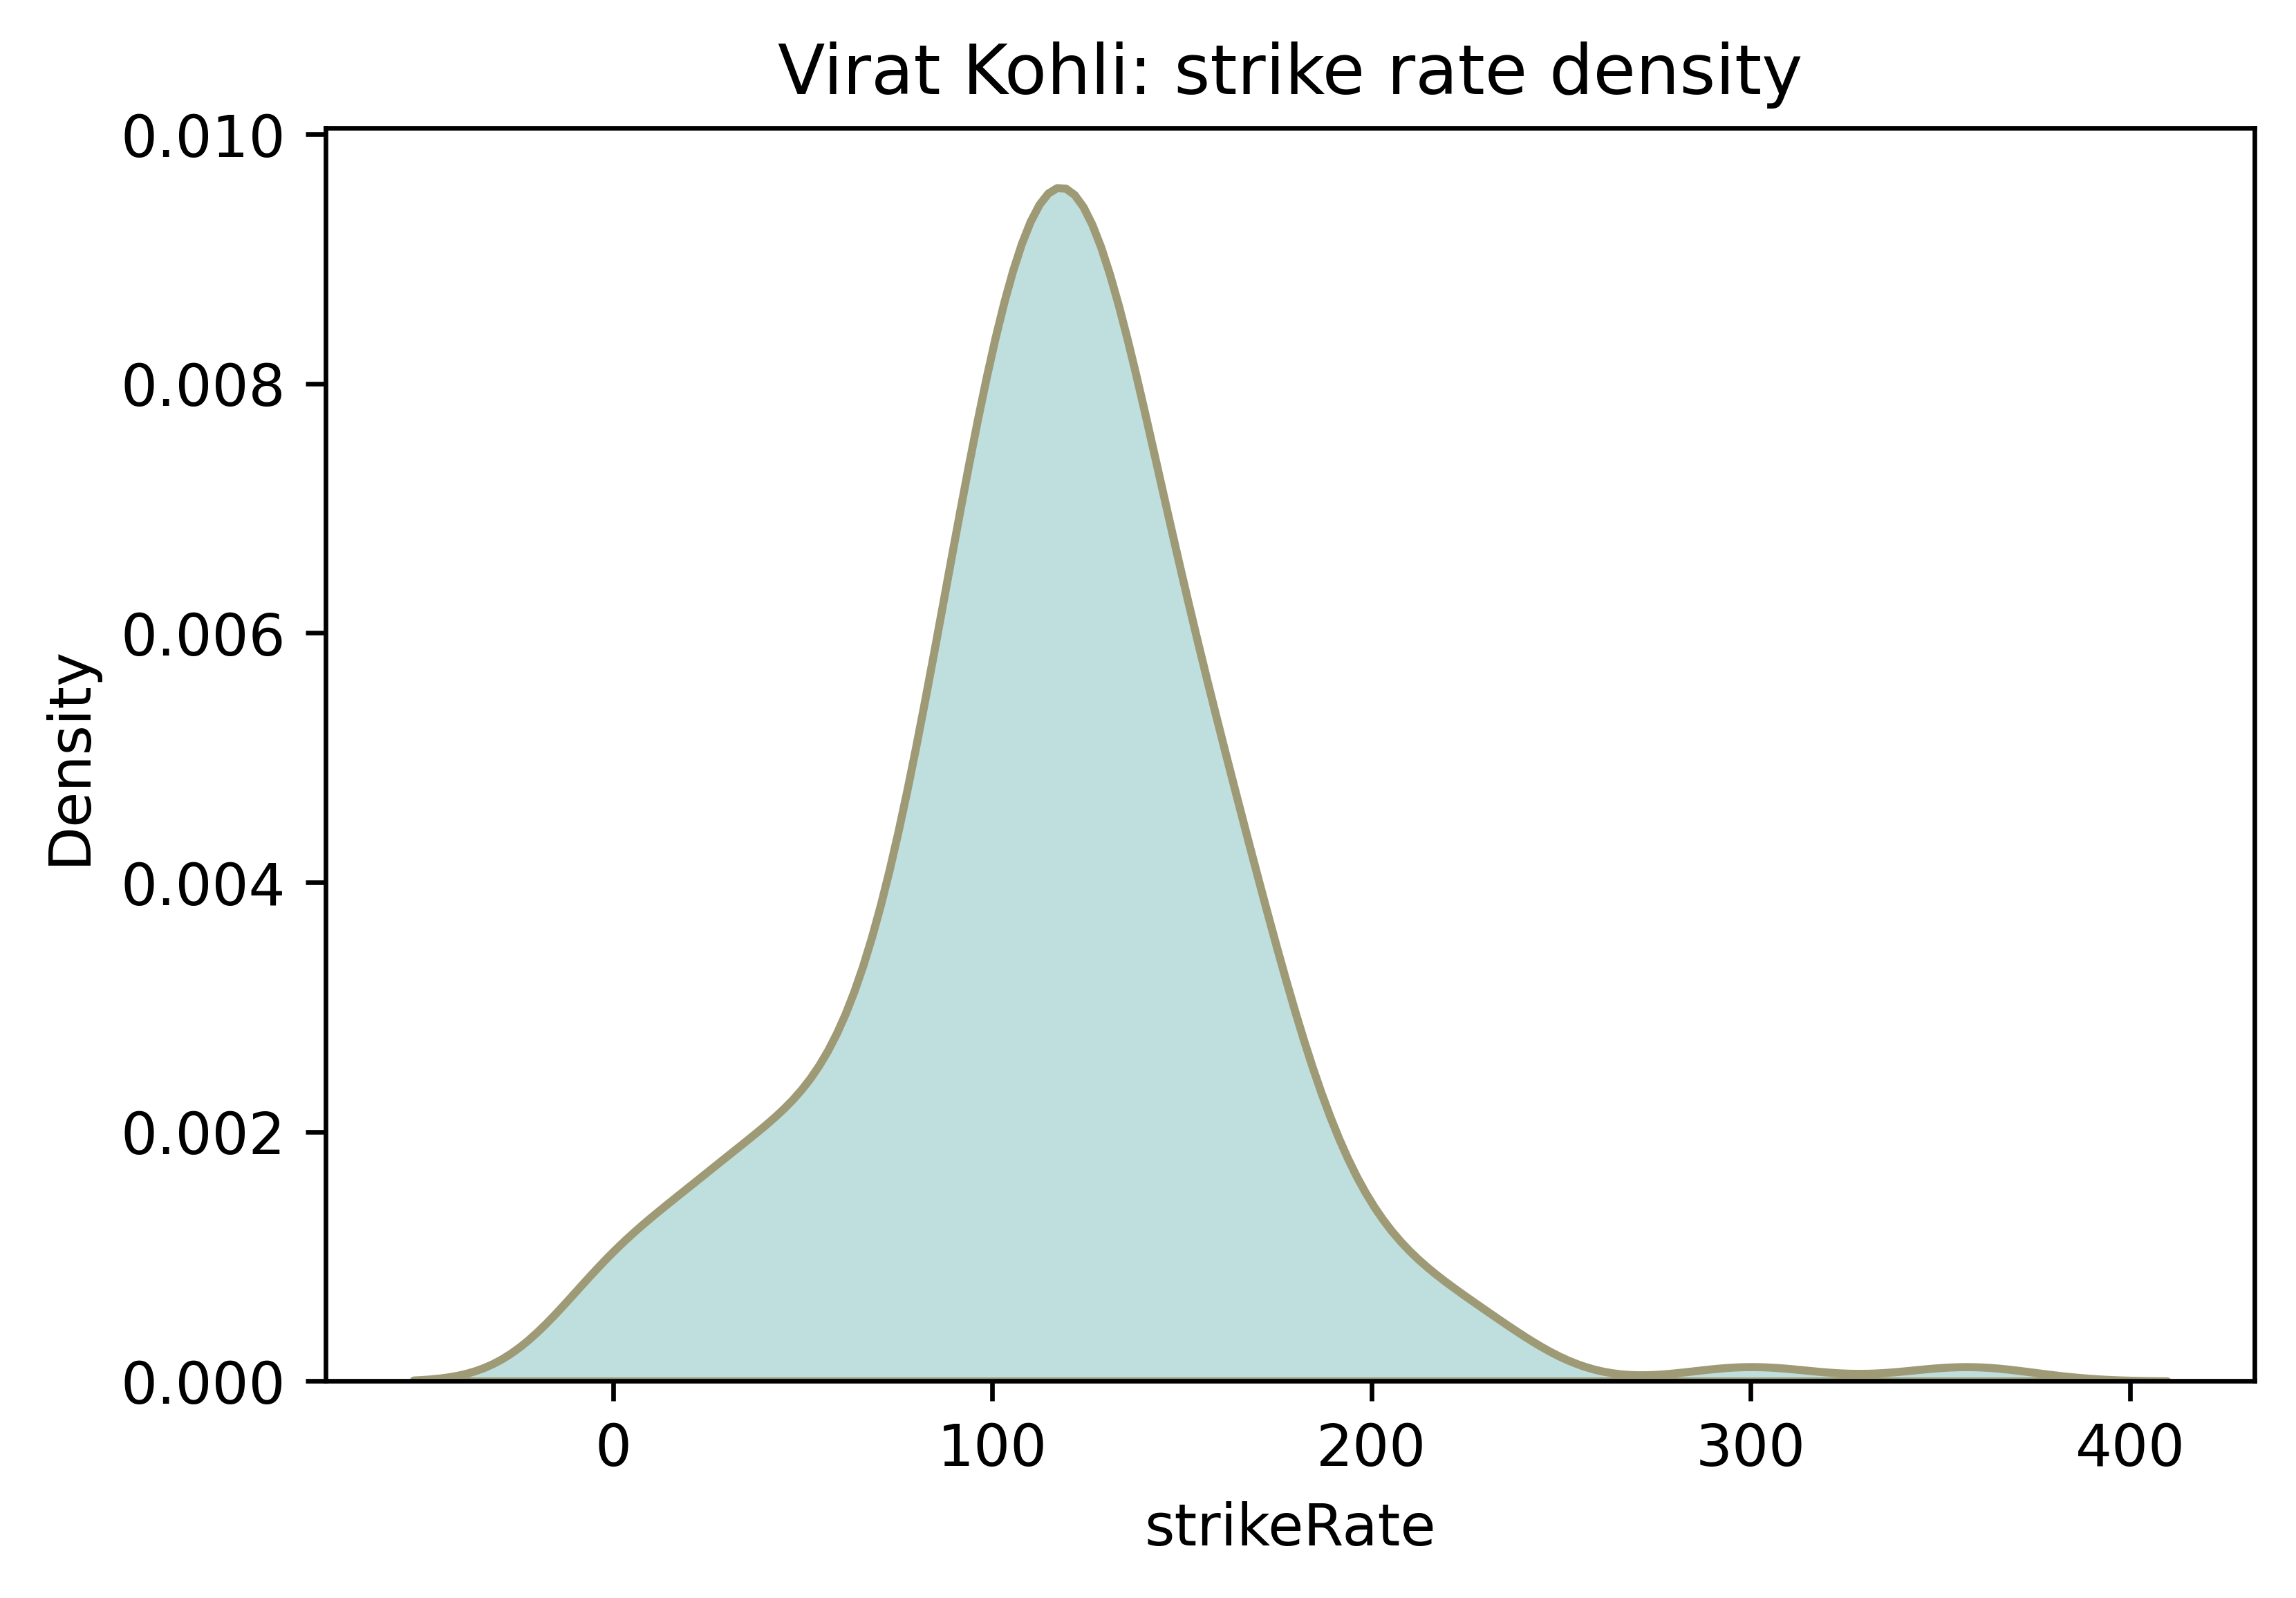

In [52]:
def strike_rate_per_match(batsman):
    strike_batsmen = season_batting_card_df[season_batting_card_df['fullName'] == batsman]
    strike_batsmen = strike_batsmen[['strikeRate']]
    strike_batsmen['strikeRate'] = strike_batsmen['strikeRate'].astype(float)
    sns.kdeplot(strike_batsmen['strikeRate'], shade=True, color='#008080', fill=True, lw=1.4, edgecolor='#9e9a75')
    plt.title("{}: strike rate density".format(batsman))

strike_rate_per_match('Virat Kohli')

<ipython-input-71-c0e0b2d580f6>:26: UserWarning:

FixedFormatter should only be used together with FixedLocator



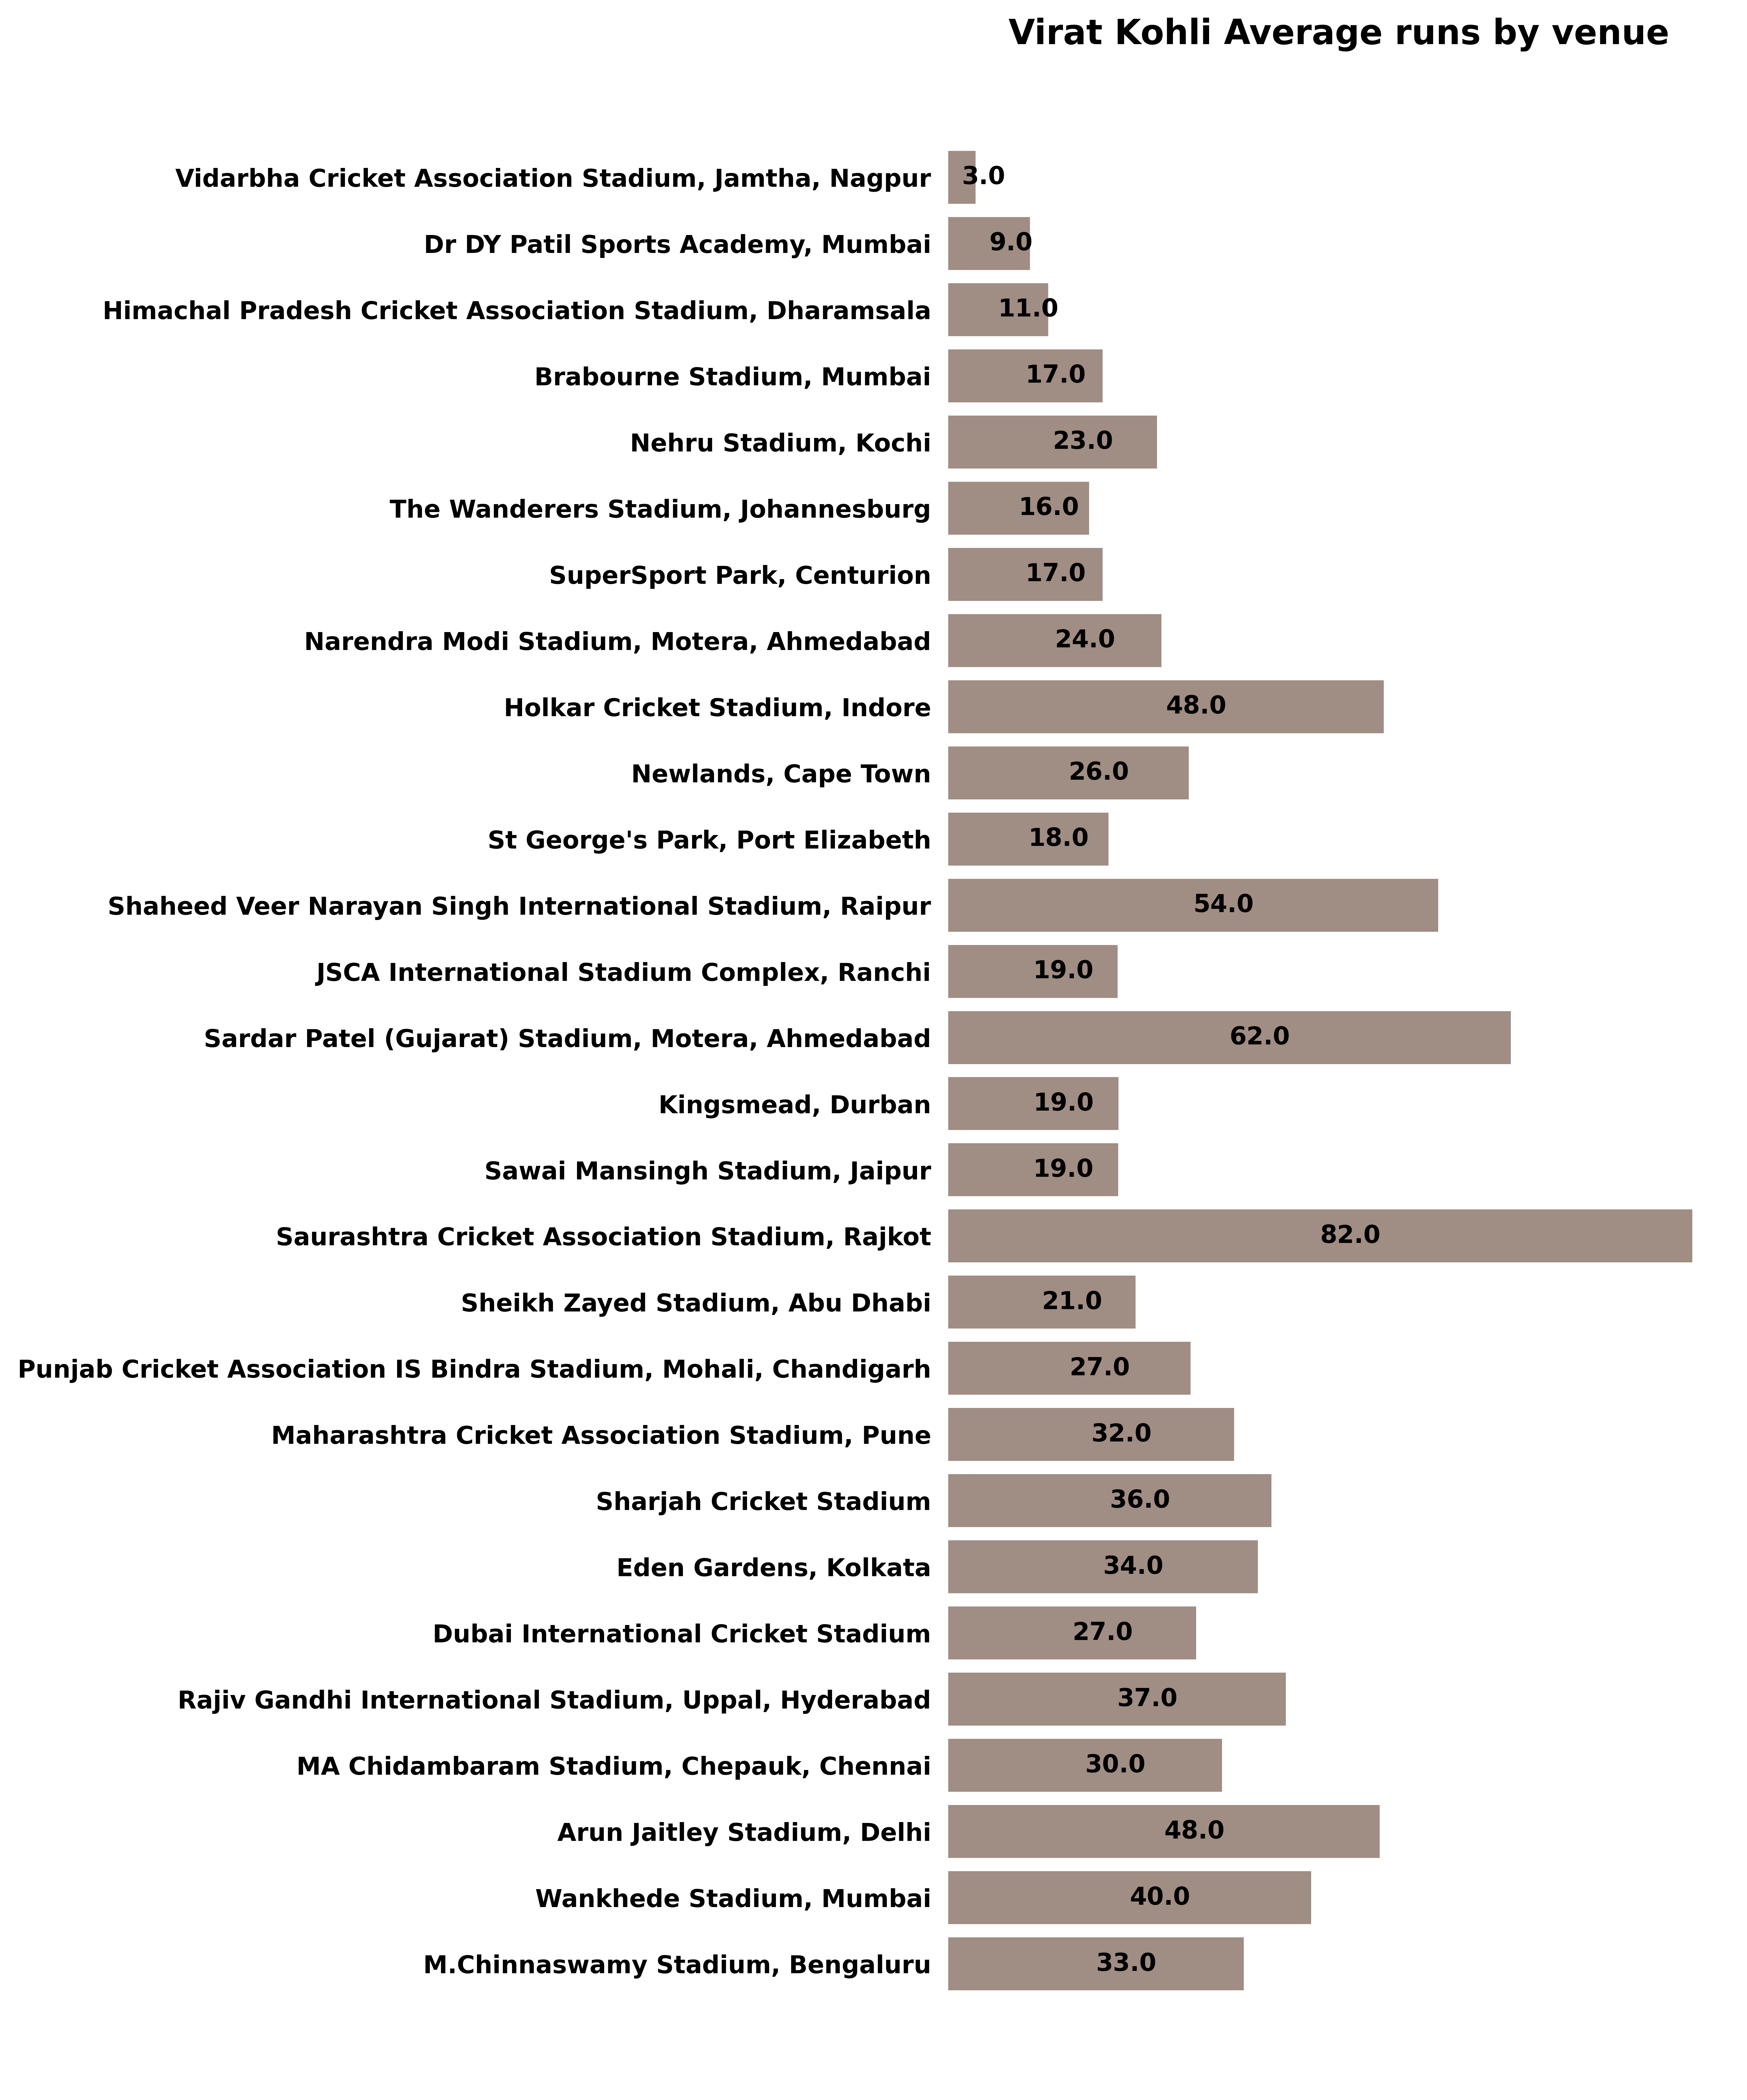

In [71]:
def batsmen_run_per_venue(batsman):
    batsmen_runs_venue = season_batting_card_df[season_batting_card_df['fullName'] == batsman]
    batsmen_runs_venue = batsmen_runs_venue[['runs', 'venue']]
    batsmen_runs_venue['matches'] = 1
    batsmen_runs_venue = batsmen_runs_venue.groupby(['venue']).sum()
    batsmen_runs_venue.reset_index(inplace=True)
    batsmen_runs_venue['average'] = batsmen_runs_venue['runs'] / batsmen_runs_venue['matches']
    batsmen_runs_venue = batsmen_runs_venue.reset_index()
    batsmen_runs_venue = batsmen_runs_venue.sort_values(by=['runs'], ascending=False)

    # plot
    #Plot the data
    plt.rcParams['figure.dpi'] = 600
    background_color = '#ffffff'
    fig = plt.figure(figsize=(10, 12), facecolor='#ffffff')

    gs = fig.add_gridspec(1,1)
    gs.update(wspace=0.3, hspace=0.4)

    locals()["ax"+str(0)] = fig.add_subplot(gs[0, 0])
    locals()["ax"+str(0)].set_facecolor(background_color)
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].barh(y = batsmen_runs_venue['venue'], width= batsmen_runs_venue['average'], label='runs', color='#A08D83')
    locals()["ax"+str(0)].set_yticklabels(batsmen_runs_venue['venue'], fontsize=10, fontweight='bold')
    locals()["ax"+str(0)].set_title('{} Average runs by venue'.format(batsman),fontsize=14, fontweight='bold')
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].xaxis.set_visible(False) 
    locals()["ax"+str(0)].tick_params(left=False)

    for p in locals()["ax"+str(0)].patches:
        value = f'{round(p.get_width(),0)}'        
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2 
        locals()["ax"+str(0)].text(x, y, value, ha='left', va='center', fontsize=10, color='black',fontweight='bold')
            
    gs.tight_layout(fig, rect=[0, 0, 1, 1])
    plt.show()

batsmen_run_per_venue('Virat Kohli')

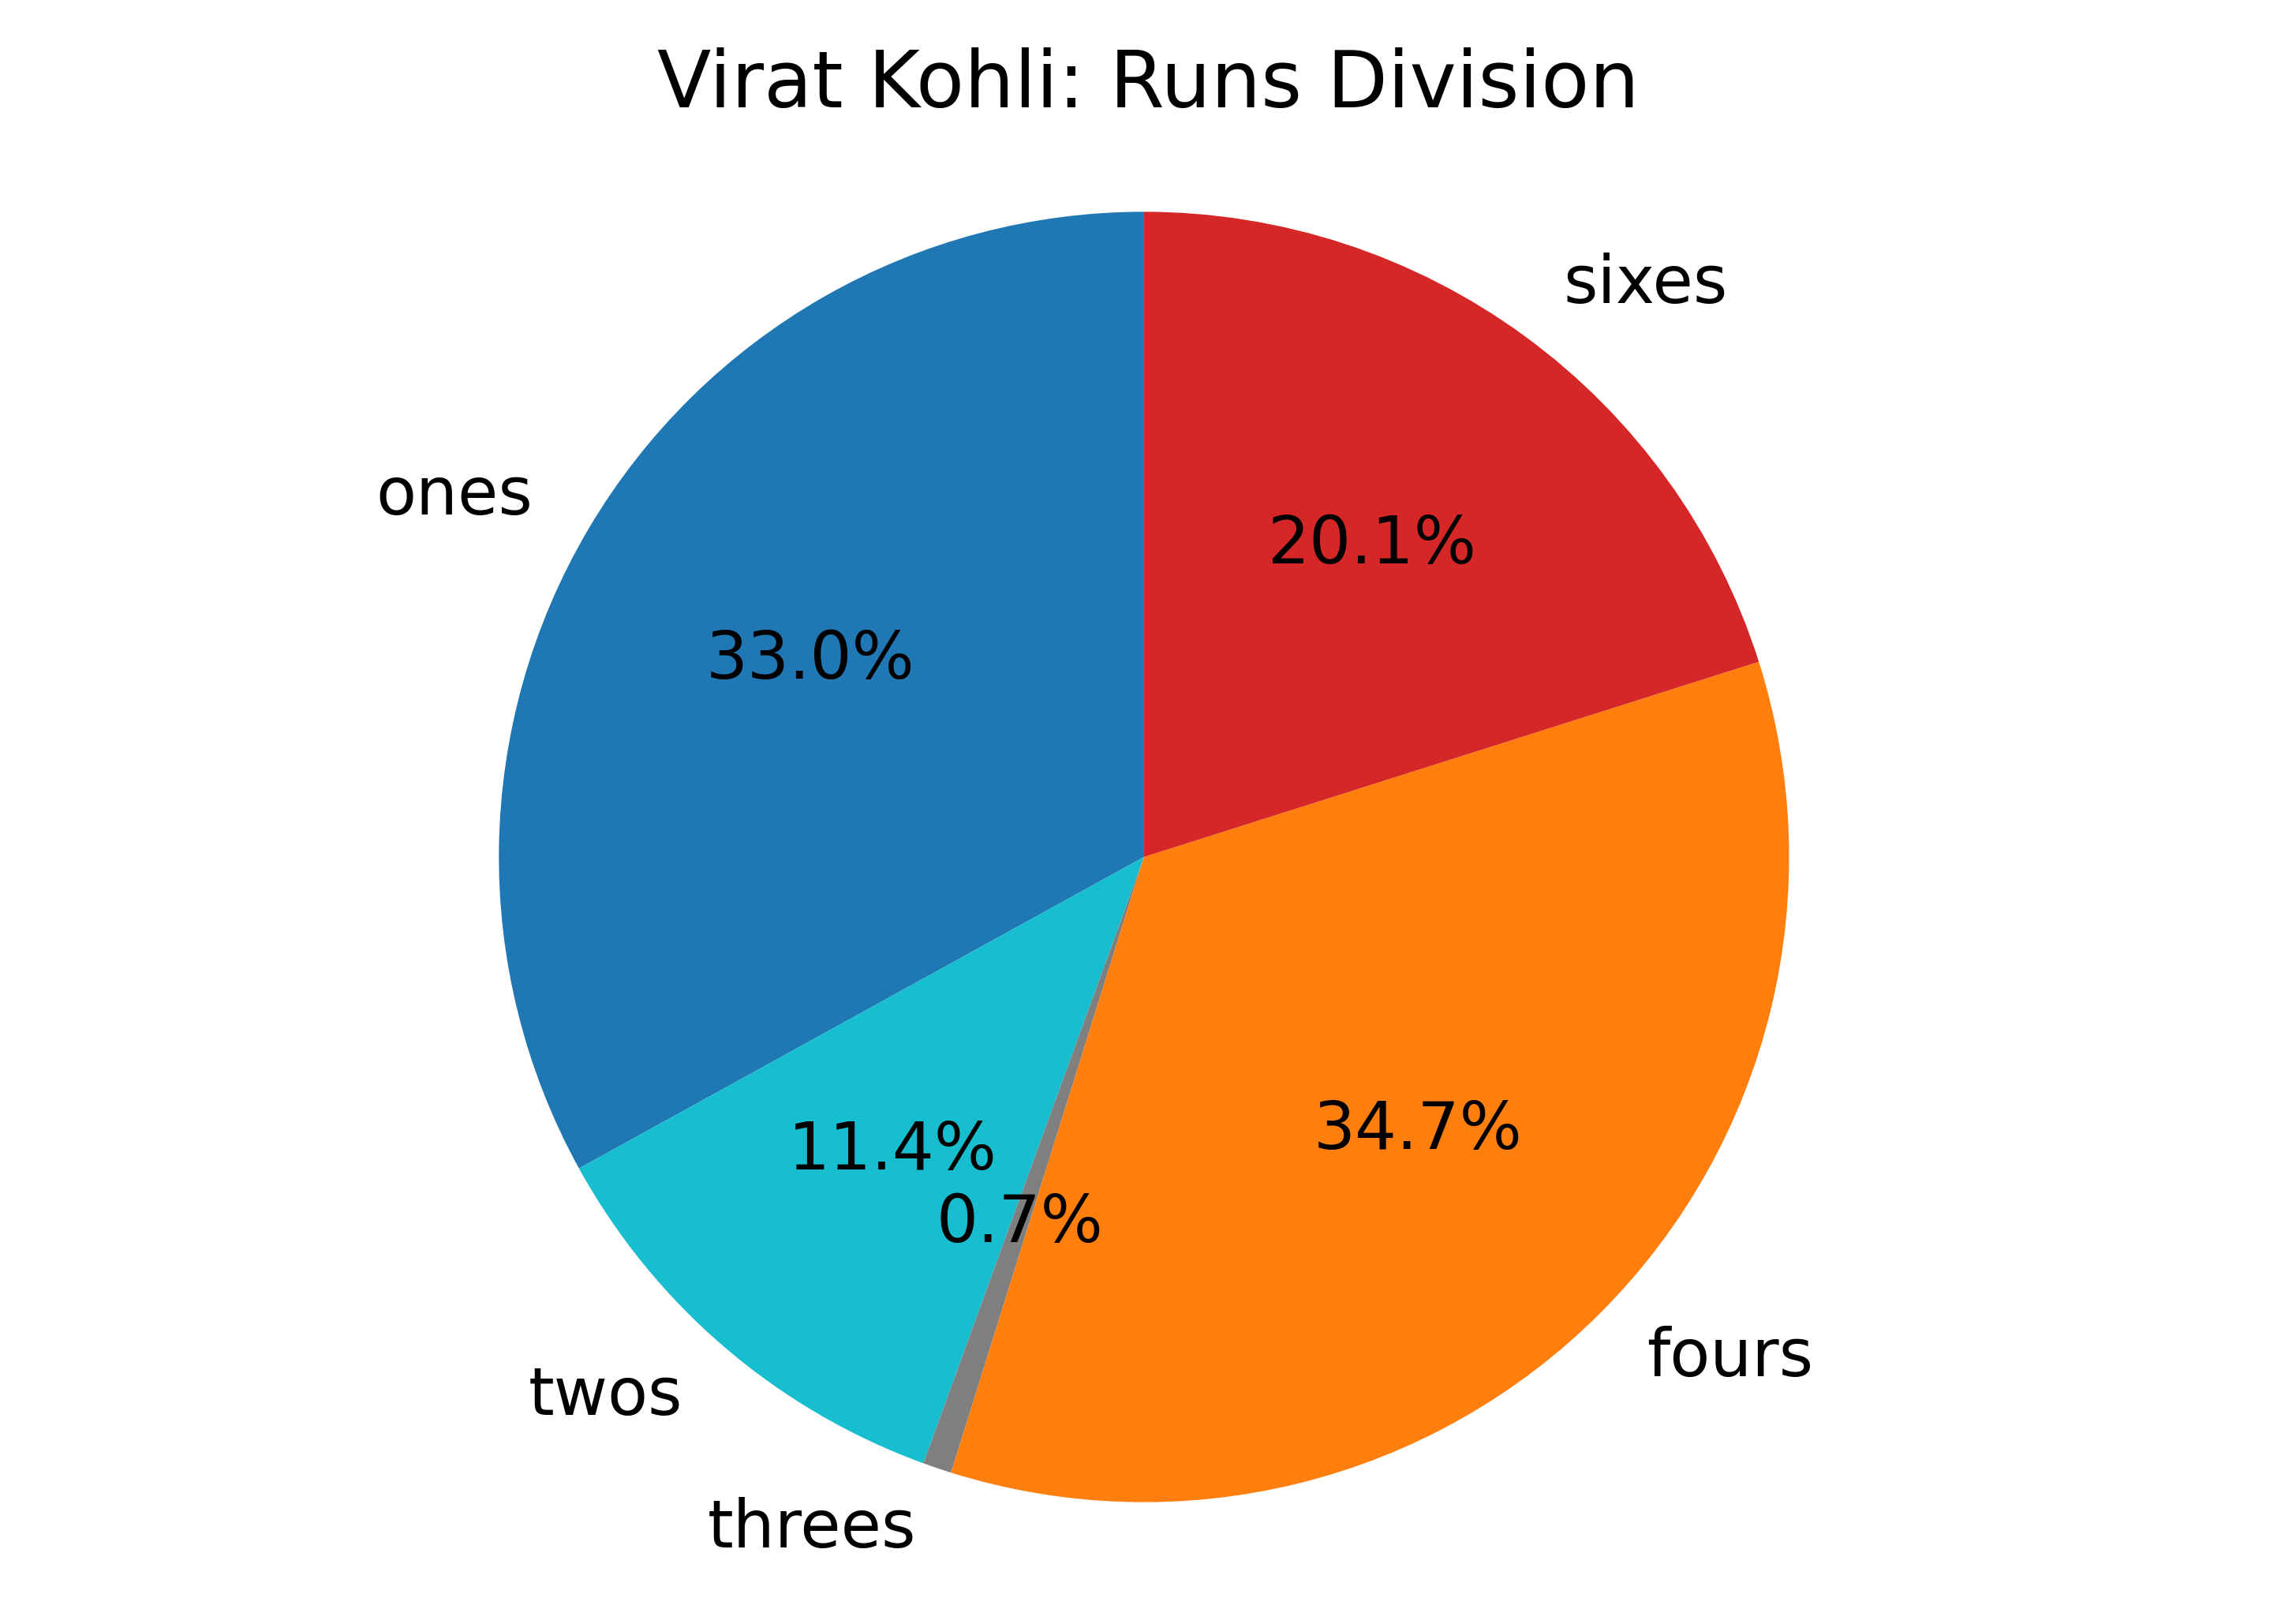

In [64]:
def bastmen_run_division(batsman):
    runs_per_ball = season_details_df[season_details_df['batsman1_name'] == batsman]
    runs_per_ball = runs_per_ball[runs_per_ball['isWide'] == False]
    runs_per_ball = runs_per_ball[runs_per_ball['isNoball'] == False]
    runs_per_ball = runs_per_ball['runs']
    runs_per_ball = list(runs_per_ball)
    runs_per_ball = [int(i) for i in runs_per_ball]
    runs_per_ball = np.array(runs_per_ball)
    # find frequency of each run
    runs_per_ball_freq = np.bincount(runs_per_ball)
    runs_per_division = [i*runs_per_ball_freq[i] for i in [1,2,3,4,6]]
    runs_per_division = np.array(runs_per_division)
    runs_per_division = runs_per_division * 100 / runs_per_division.sum()
    # take round 2 decimal
    runs_per_division = np.round(runs_per_division, 2)
    # plot
    explode = (0, 0, 0, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
    labels = ['ones','twos','threes','fours', 'sixes']
    colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']
    fig1, ax = plt.subplots()
    ax.pie(runs_per_division, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90, colors = colors)
    ax.axis('equal') 
    

    ax.set_title('{}: Runs Division'.format(batsman))
    plt.show()

bastmen_run_division('Virat Kohli')

<ipython-input-70-6d907e7e97b5>:28: UserWarning:

FixedFormatter should only be used together with FixedLocator



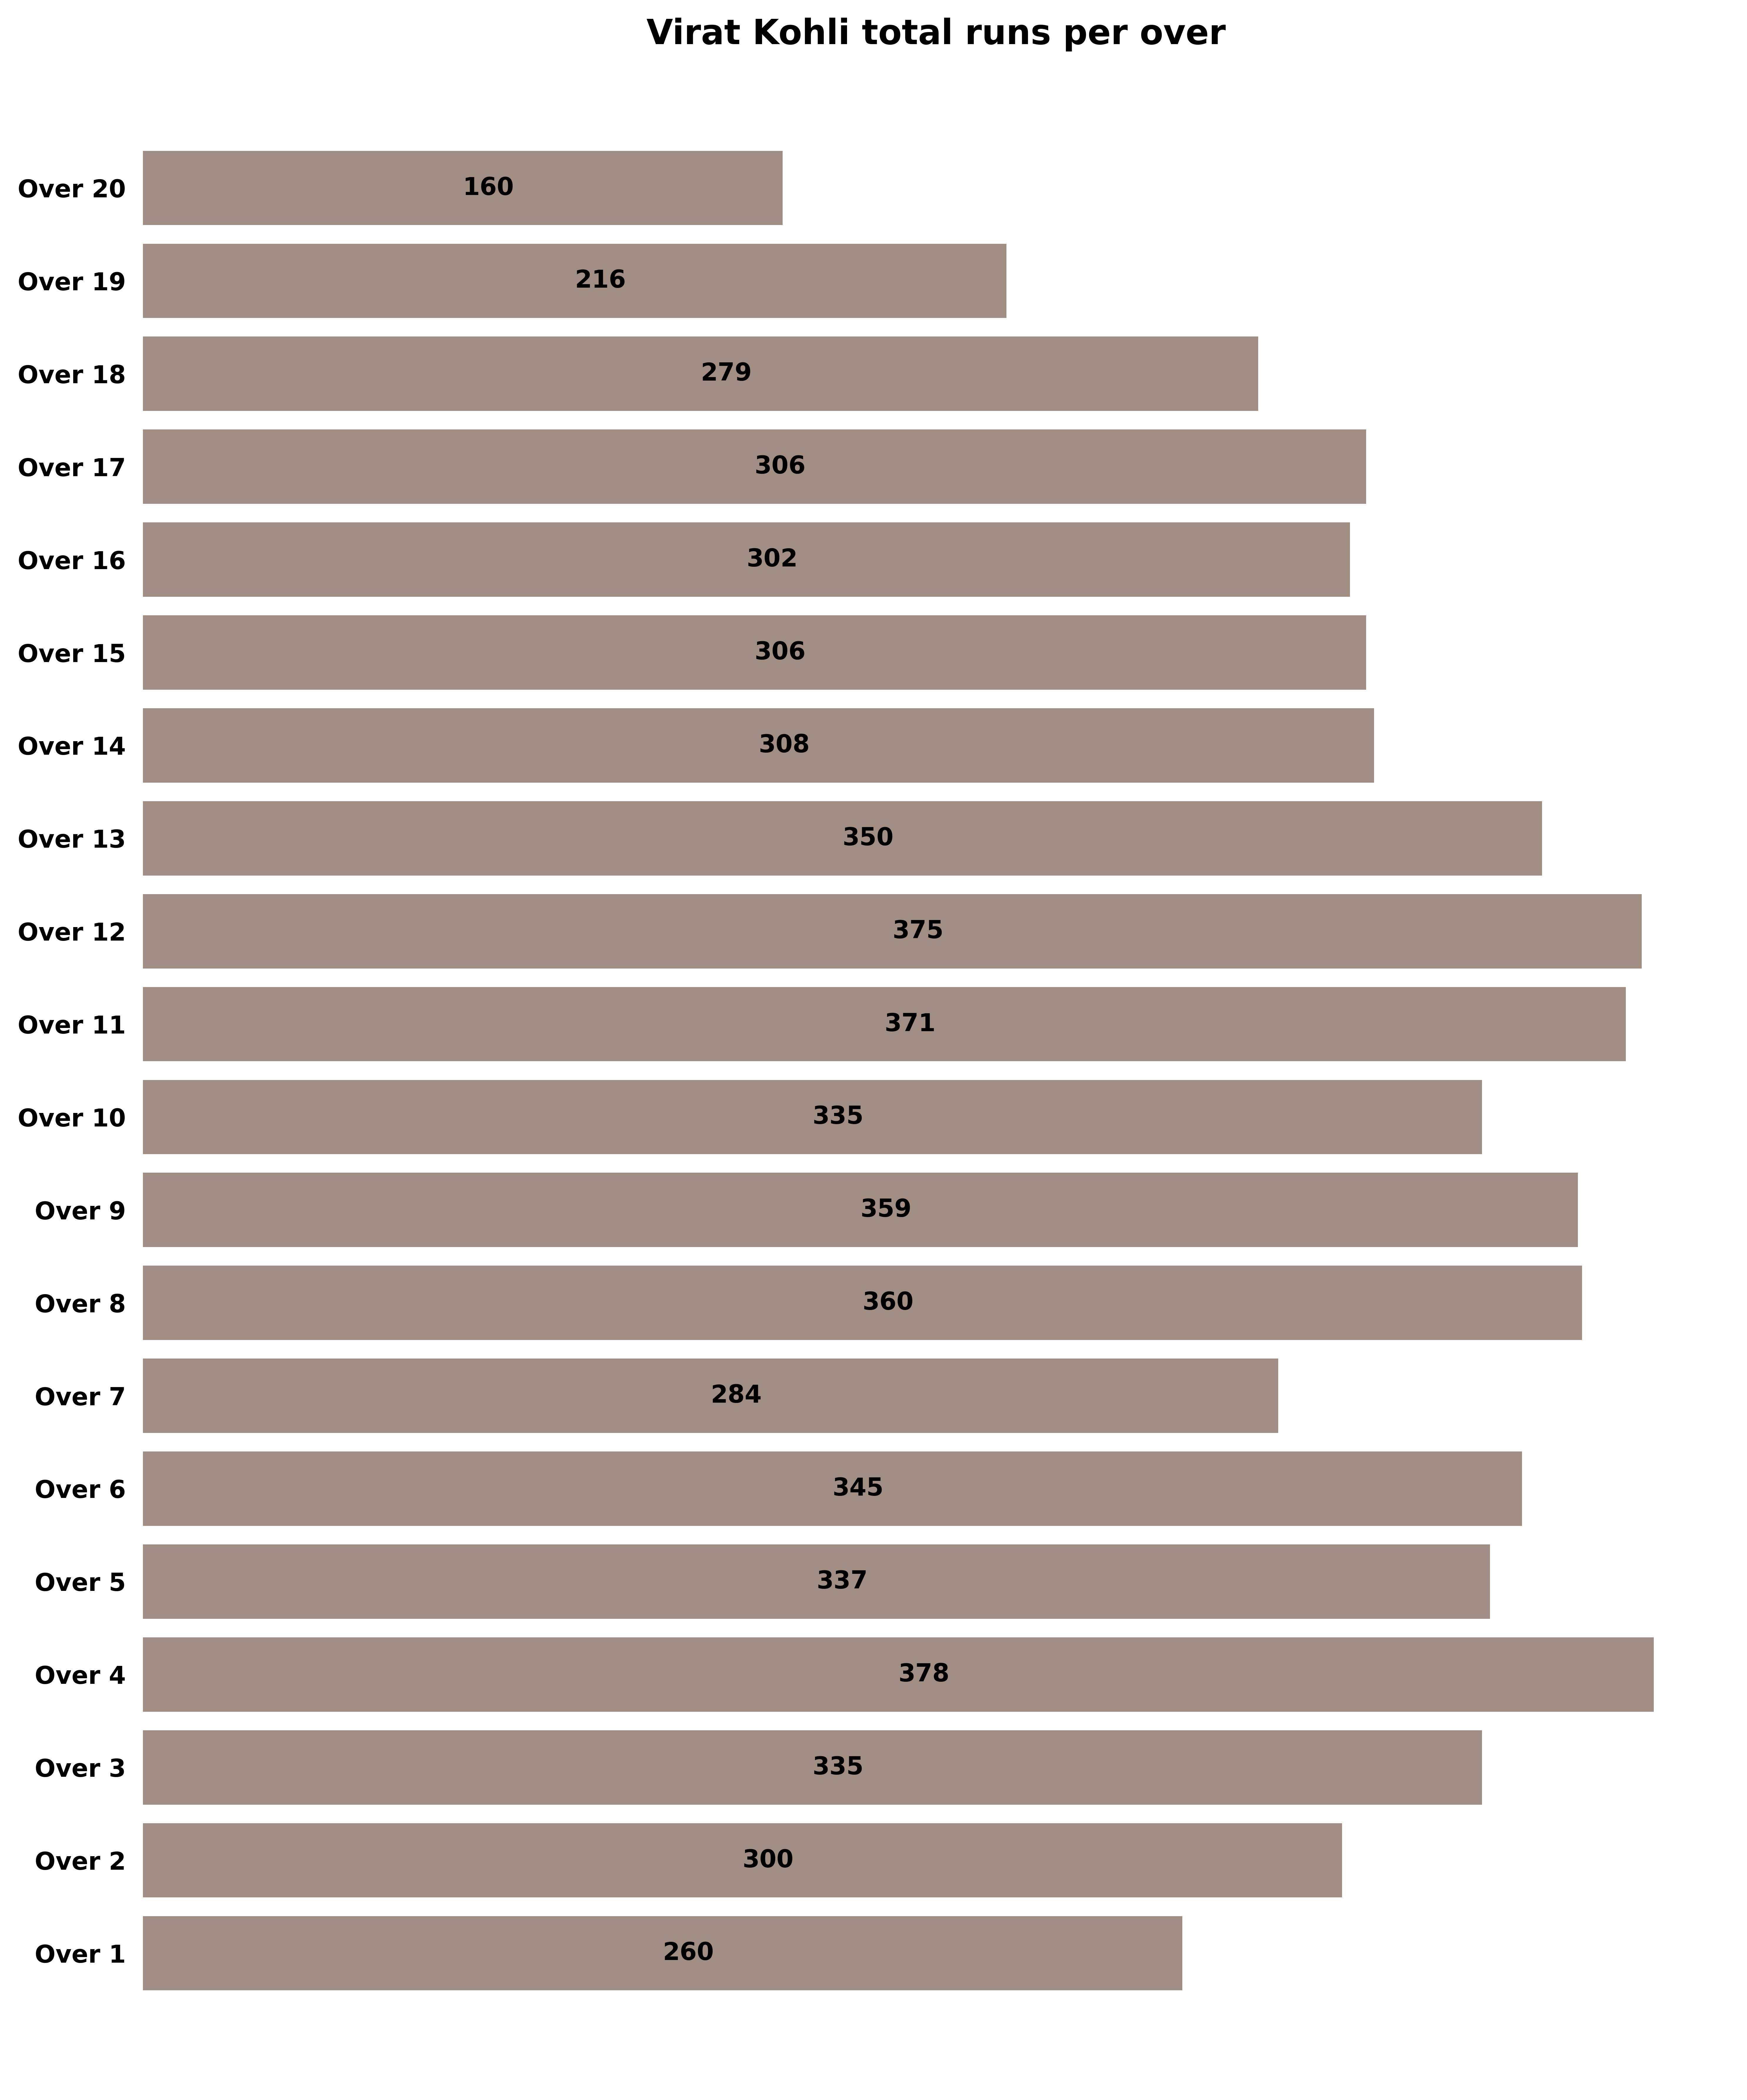

In [70]:
def runs_per_over(batsman):
    runs_per_over = season_details_df[season_details_df['batsman1_name'] == batsman]
    runs_per_over = runs_per_over[runs_per_over['isWide'] == False]
    runs_per_over = runs_per_over[runs_per_over['isNoball'] == False]
    runs_per_over = runs_per_over[['over','runs']]
    runs_per_over['balls'] = 1
    runs_per_over = runs_per_over.groupby(['over']).sum()
    runs_per_over['avg_run'] = runs_per_over['runs'] / runs_per_over['balls']
    runs_per_over['strike rate'] = runs_per_over['avg_run'] * 100
    runs_per_over = runs_per_over.reset_index()
    runs_per_over['over'] = runs_per_over['over'].astype(int)
    runs_per_over['over'] = runs_per_over['over'].map(lambda x : "Over "+ str(x))
    # plot
    #Plot the data
    plt.rcParams['figure.dpi'] = 600
    background_color = '#ffffff'
    fig = plt.figure(figsize=(10, 12), facecolor='#ffffff')

    gs = fig.add_gridspec(1,1)
    gs.update(wspace=0.3, hspace=0.4)

    locals()["ax"+str(0)] = fig.add_subplot(gs[0, 0])
    locals()["ax"+str(0)].set_facecolor(background_color)
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].barh(y = runs_per_over['over'], width= runs_per_over['runs'], label='runs', color='#A08D83')
    locals()["ax"+str(0)].set_yticklabels(runs_per_over['over'], fontsize=10, fontweight='bold')
    locals()["ax"+str(0)].set_title('{} total runs per over'.format(batsman),fontsize=14, fontweight='bold')
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].xaxis.set_visible(False) 
    locals()["ax"+str(0)].tick_params(left=False)

    for p in locals()["ax"+str(0)].patches:
        value = f'{round(p.get_width(),0)}'        
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2 
        locals()["ax"+str(0)].text(x, y, value, ha='left', va='center', fontsize=10, color='black',fontweight='bold')
            
    gs.tight_layout(fig, rect=[0, 0, 1, 1])
    plt.show()

runs_per_over('Virat Kohli')

<ipython-input-76-49b021b159fd>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



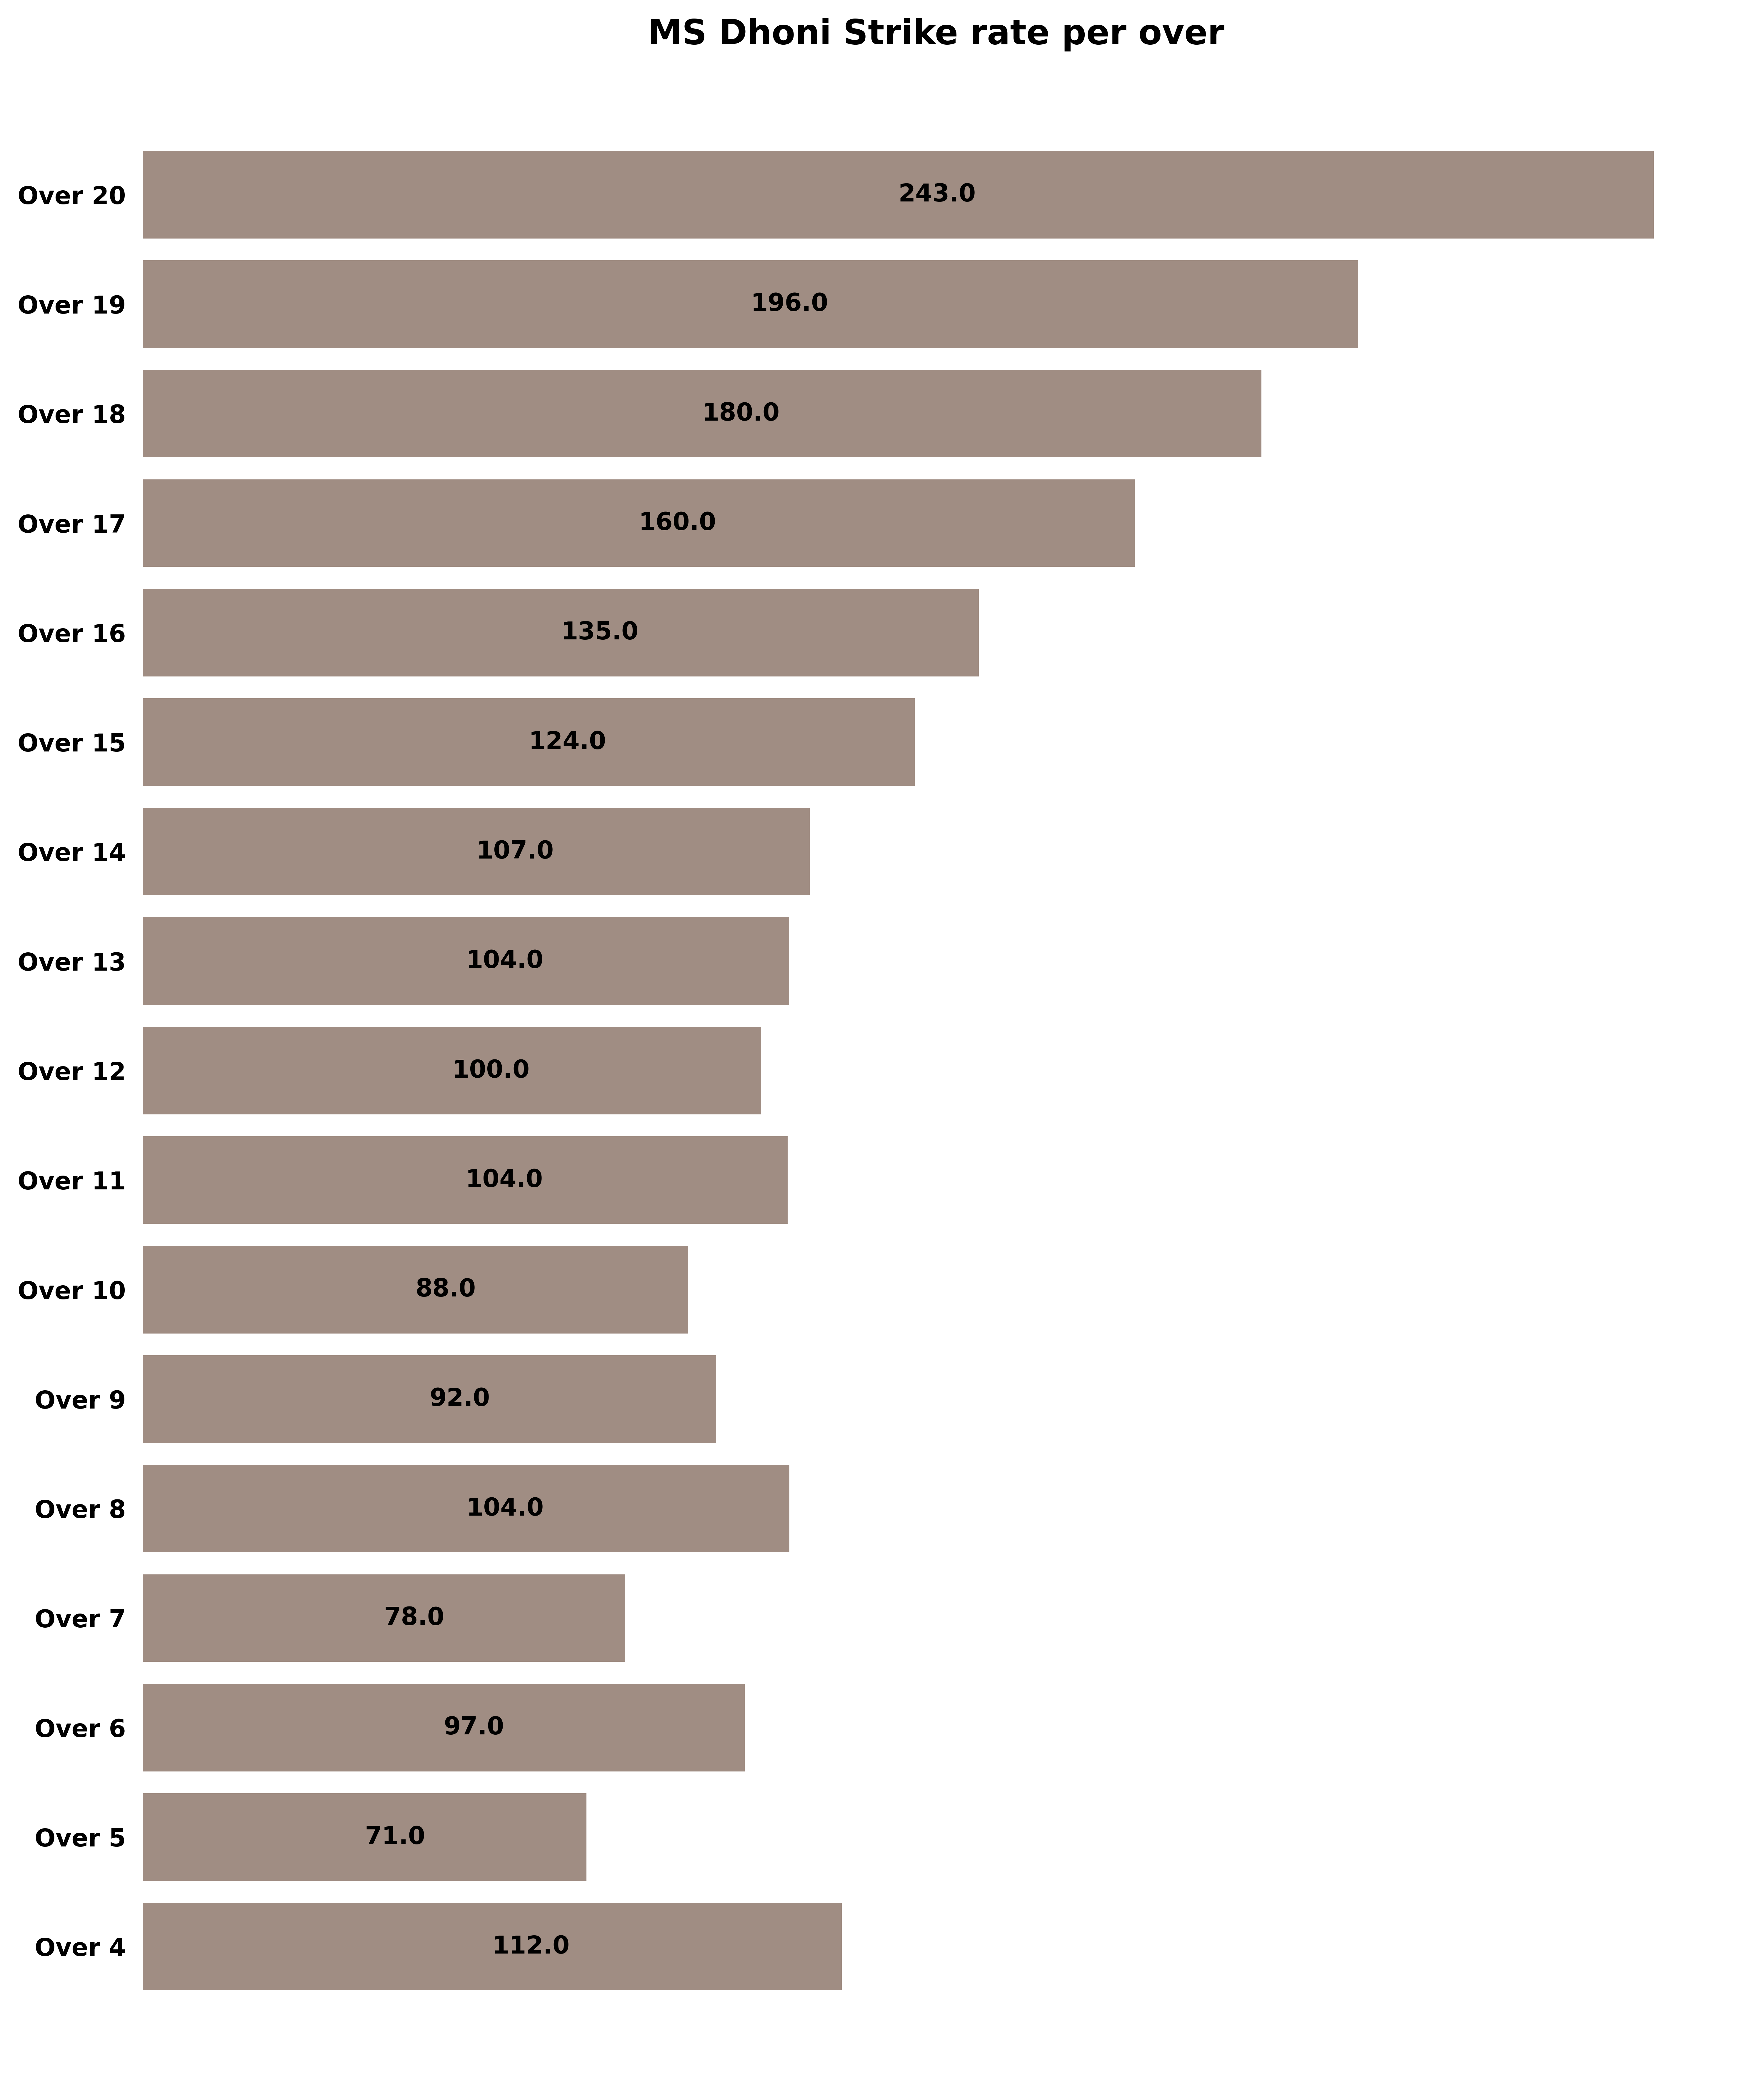

In [76]:
def strike_rate_per_over(batsman):
    runs_per_over = season_details_df[season_details_df['batsman1_name'] == batsman]
    runs_per_over = runs_per_over[runs_per_over['isWide'] == False]
    runs_per_over = runs_per_over[runs_per_over['isNoball'] == False]
    runs_per_over = runs_per_over[['over','runs']]
    runs_per_over['balls'] = 1
    runs_per_over = runs_per_over.groupby(['over']).sum()
    runs_per_over  = runs_per_over[runs_per_over['runs'] > 0]
    runs_per_over['avg_run'] = runs_per_over['runs'] / runs_per_over['balls'].map(lambda x : max(x,1))
    runs_per_over['strike rate'] = runs_per_over['avg_run'] * 100
    runs_per_over = runs_per_over.reset_index()
    runs_per_over['over'] = runs_per_over['over'].astype(int)
    runs_per_over['over'] = runs_per_over['over'].map(lambda x : "Over "+ str(x))
    # plot
    #Plot the data
    plt.rcParams['figure.dpi'] = 600
    background_color = '#ffffff'
    fig = plt.figure(figsize=(10, 12), facecolor='#ffffff')

    gs = fig.add_gridspec(1,1)
    gs.update(wspace=0.3, hspace=0.4)

    locals()["ax"+str(0)] = fig.add_subplot(gs[0, 0])
    locals()["ax"+str(0)].set_facecolor(background_color)
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].barh(y = runs_per_over['over'], width= runs_per_over['strike rate'], label='runs', color='#A08D83')
    locals()["ax"+str(0)].set_yticklabels(runs_per_over['over'], fontsize=10, fontweight='bold')
    locals()["ax"+str(0)].set_title('{} Strike rate per over'.format(batsman),fontsize=14, fontweight='bold')
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].xaxis.set_visible(False) 
    locals()["ax"+str(0)].tick_params(left=False)

    for p in locals()["ax"+str(0)].patches:
        value = f'{round(p.get_width(),0)}'        
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2 
        locals()["ax"+str(0)].text(x, y, value, ha='left', va='center', fontsize=10, color='black',fontweight='bold')
            
    gs.tight_layout(fig, rect=[0, 0, 1, 1])
    plt.show()

strike_rate_per_over('MS Dhoni')